# Prediction Diabetes with Multilayer Perceptrons

## What is Diabetes? How does diabetes affect the body?

Diabetes is a chronic medical condition associated with elevated blood sugar levels in the body. Diabetes of list of cardiovascular disease, stroke, kidney damage and long term damage to extremities that is live in ice.

They estimate that have 400 and 15 million people in the war, suffers from diabetes and u to five million deaths every year, attributed diabetic related complications in the United Stated that are estimated to be seven highest court deaths.

Clearly, diabetes is core of concern to be well-being of modern society. Diabetes can be divided into two subtitled, Type 1 and Type 2.

Both types of diabetes are chronic diseases that affect the way your body regulates blood sugar, or glucose. Glucose is the fuel that feeds your body’s cells, but to enter your cells it needs a key. Insulin is that key.

People with **type 1 diabetes** don’t produce insulin. You can think of it as not having a key.

People with **type 2 diabetes** don’t respond to insulin as well as they should and later in the disease often don’t make enough insulin. You can think of it as having a broken key.

Both types of diabetes can lead to chronically high blood sugar levels. That increases the risk of diabetes complications.

## What are the symptoms of diabetes?
If not managed, type 1 and type 2 diabetes can lead to symptoms such as:
* urinating frequently
* feeling very thirsty and drinking a lot
* feeling very hungry
* feeling very fatigued
* having blurry vision
* having cuts or sores that don’t heal properly

People with type 1 and type 2 diabetes may also experience irritability, mood changes, and unintentional weight loss.

People with type 1 and type 2 diabetes may also have numbness and tingling in their hands or feet. Good glucose management significantly reduces the risk of developing numbness and tingling in someone with type 1 diabetes, according to the American Diabetes Association (ADA).

Although many of the symptoms of type 1 and type 2 diabetes are similar, they present in very different ways.

Many people with type 2 diabetes won’t have symptoms for many years, and their symptoms often develop slowly over the course of time. Some people with type 2 diabetes have no symptoms at all and don’t discover they have the condition until complications arise.

The symptoms of type 1 diabetes develop quickly, typically over the course of several weeks. Once known as juvenile diabetes, this type usually develops in childhood or adolescence. However, it’s possible to develop type 1 diabetes later in life.

## How are type 1 and type 2 diabetes diagnosed?

The primary test used to diagnose both type 1 and type 2 diabetes is known as the A1C, or glycated hemoglobin, test.

**Resources:**
* https://www.healthline.com/health/difference-between-type-1-and-type-2-diabetes#How-does-diabetes-affect-the-body?

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting the data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ai-for-healthcare/diabetes-prediction/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



**Features Explanation**

*   Pregnancies: Number of previous pregnancies
*   Glucose: Plasma glucose concentration
*   BloodPressure: Diastolic blood pressure
*   SkinThickess: Skin fold thickness measured from the triceps
*   Insulin: Blood serum insulin concentration
*   BMI: Body Mass Index
*   DiabetesPedigreeFunction: A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
*   Age: Age in years
*   Outcome: The target variable we are trying to predict , 1 for patients that developed diabetes within 5 years of the initial measurement and 0 otherwise











## Data Visualizations

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

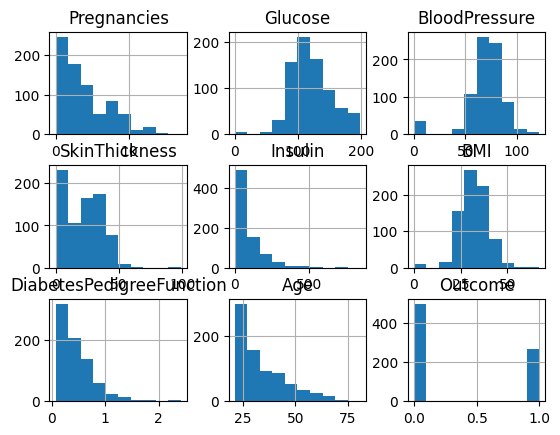

In [ ]:
df.hist()

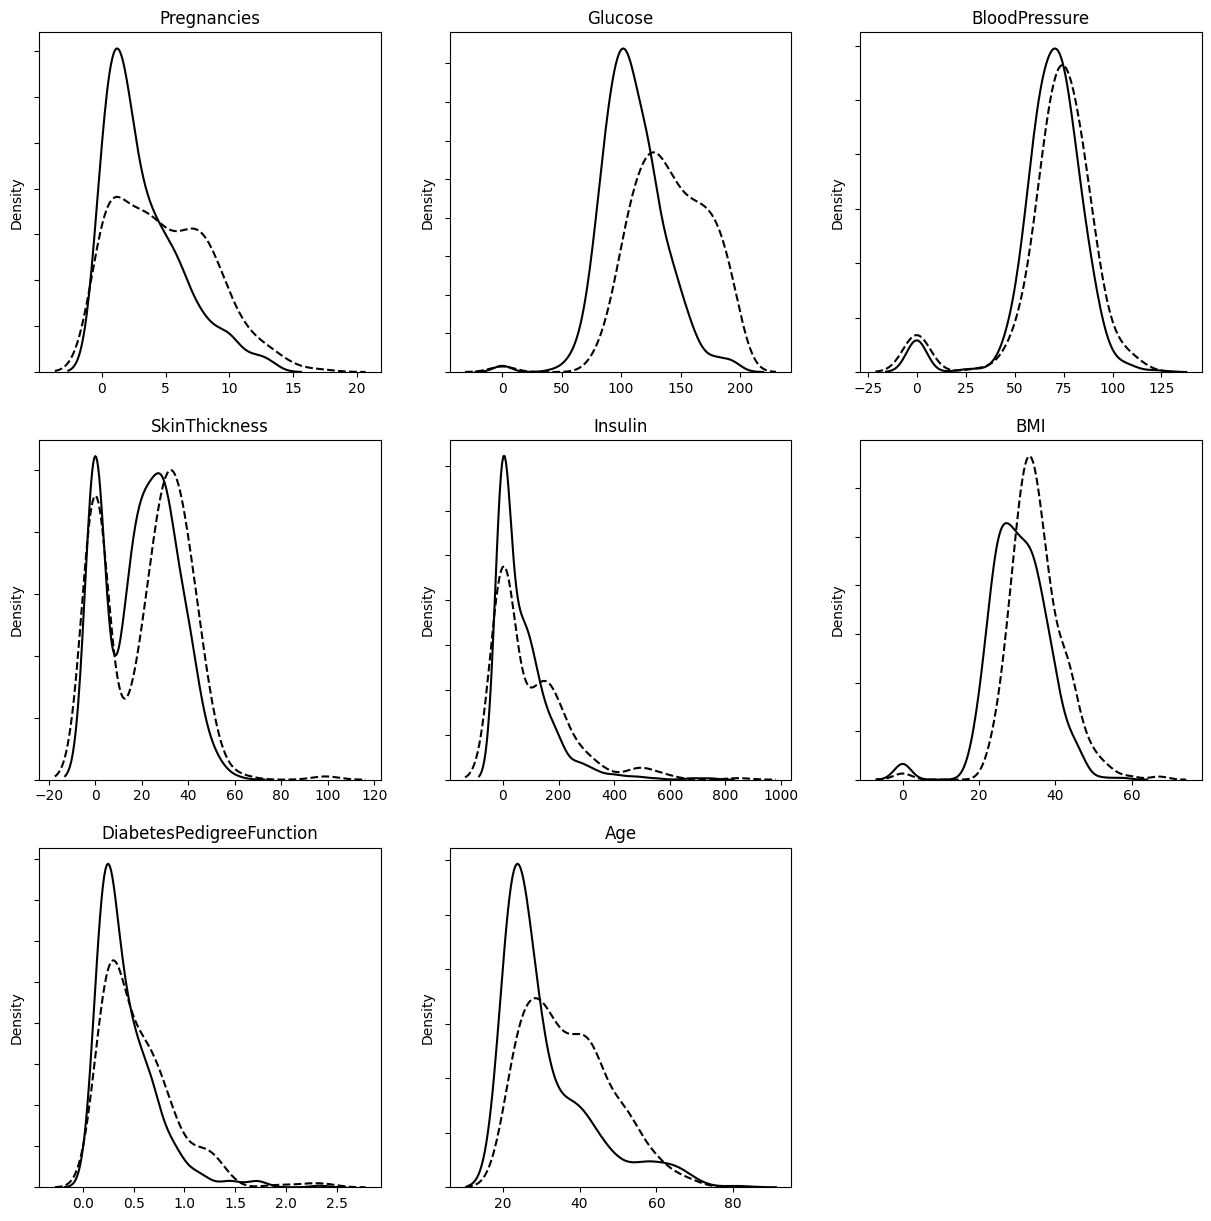

In [ ]:
import seaborn as sns
# create a subplot of 3x3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

#Hide the 9th subplot (bottom right since there are only 8 plots)
plt.subplot(3,3,9).set_visible(False)

plt.show()

100mg/dL

*   Dash line is Diabetics
*   Solid line is non-Diabetics

150mg/dL

## Missing Data Handling

In [ ]:
df.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There are several techniques to handle these missing values:

* Remove (discard) any rows with missing values
* Replace the missing values with mean/median/mode of the non-missing values
* Predict the actual values using a separate machine learning model

In [ ]:
#Replace 0 value with NaN
import numpy as np
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)

df['BMI'] = df['BMI'].replace(0,np.nan)

## Data Standardization

In [ ]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
# Replace Nan values with the mean of the non-missing values by using fillna()
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit variance.


*   Insulin and DiabetesPedigreeFunction have vastly different scales. The maximum value for Insulin is 846 while the maximum value for DiabetesPedigreeFunction is only 2.42

In [ ]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

df.describe().loc[['mean','std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


## Data Splitting

1.   Training set: The neural network will be trained on this subset of the data
2.   Validation set: This set of data allows us to perform hyperparameter tuning(That is, tuning the number of hidden layers) using an unbiased source of data
1.   Testing set: The final evaluation of the neural network will be based on this subset of the data.

The purpose of splitting the data into training, testing and validation sets is to avoid overfitting and to provide an unbiased source of data for evaluating performance

*   If we allocate most of our data for training purposes, model performance will increase at the detriment of our ability to avoid overfitting.
*   If we allocate most of our data for validation and testing purposes, model performance will decrease as there might be insufficient data for training.

There are some steps:

*   Original data is 1st splitted into training (80%) and testing (20%)
*   Training set is 2nd splitted into training set, validation set and testing set.
Splitting data must be done at random
*   First, let's separate the dataset into X(input features) and y(target variable)


In [ ]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
# Split the data into training set(80%) and the testing set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Make a second split to create the final training set and the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2)

## Data Modelling

In [ ]:
from keras.models import Sequential
model = Sequential()

*   The first hidden layer will have 32 nodes
*   The input dimension will be 8 because there 8 columns in X_train

In [ ]:
from keras.layers import Dense # Add the first Hidden layer
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))# Add the second hidden layer
model.add(Dense(1, activation='sigmoid'))

There are three different parameters we need to define for the training process

*   Optimizer: Let's use the adam optimizer, which is a popular optimizer in Keras. For most datasets, the adam optimizer will work well without much tuning
*   Loss function: We will use binary_crossentropy as our loss function since the problem at hand is a binary classification problem.

*   Metrics: We will use accuracy (that is the percentage of correctly classified samples) as our evaluation metric.

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Train the model for 200 epochs
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5024 - loss: 0.7133
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.6405 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.5906 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - loss: 0.5520 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.5189 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.4881  
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7593 - loss: 0.4905 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.4666 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.4669 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7662 - loss: 0.4701 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7710 - loss: 0.4507 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.2109  
Training Accuracy: 91.45%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.6161 
Testing Accuracy: 73.38%



*   True negative: Actual class is negative (no diabetes), and the model predicted negative (no diabetes)
*   False positive : Actual class is negative (no diabetes), but the model predicted positive (diabetes)


*   False negative: Actual class is positive (diabetes) but the model predicted negative (no diabetes)
*   True positive: Actual class is positive (diabetes), and the model predicted positive (diabetes)

## Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(50.72222222222221, 0.5, 'Actual')

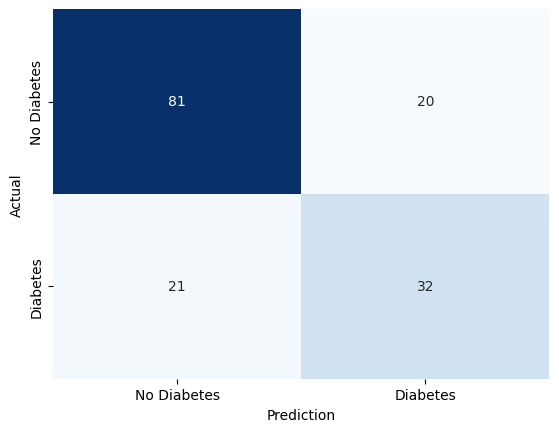

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cbar= False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

*   True positive rate (TPR) = True positive / (True positive + false negative)
*   False positive Rate (FPR) = False positive /(true Negative + False Positive)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)
FPR,TPR, _= roc_curve(y_test,y_test_pred_probs)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0, 0.5, 'True Positive Rate')

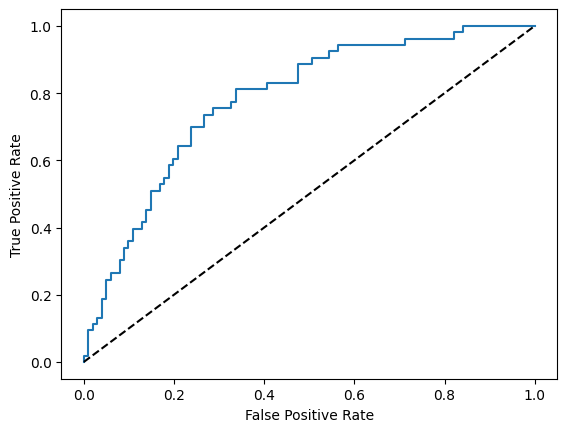

In [ ]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')#diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')